In [4]:
from google.colab import files
files.upload()  # Select kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karanjadhav6020111","key":"ae5efa5e83e6e93f3d103e9e805e869a"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [7]:
!unzip new-plant-diseases-dataset.zip -d /content/dataset
import tensorflow as tf




Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Set dataset directories
train_dir = "/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"  # Adjust this based on your extracted folder path
valid_dir = "/content/dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"



In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [52]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [53]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [54]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
for x,y in training_set:
    print(x.shape)
    print(y.shape)
    break

(32, 128, 128, 3)
(32,)


In [56]:
from tensorflow.keras.utils import to_categorical

# Function to one-hot encode labels
def process_data(image, label):
    label = tf.one_hot(label, depth=38)  # Convert to (38,)
    return image, label

# Apply transformation to dataset
training_set = training_set.map(process_data)
validation_set = validation_set.map(process_data)


In [57]:
for x, y in training_set.take(1):
    print(x.shape)  # Should be (32, 256, 256, 3)
    print(y.shape)  # Should be (32, 38)

for x, y in validation_set.take(1):
    print(x.shape)  # Should be (32, 256, 256, 3)
    print(y.shape)  # Should be (32, 38)

(32, 128, 128, 3)
(32, 38)
(32, 128, 128, 3)
(32, 38)


## TO avoid overshooting problem
1) Choose small learning rate default is 0.001 we modified to 0.0001
2) There might be the chance of the underfitting so increase the size of the neurons
3) Add more convolution layer to extract  more features
    from the images , there might be the possiblity
    that model is unable to capture relavent features or model is
    confusing due to lack of feacture so introduce more **features** bold text

In [18]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))


We add dropout for reducing overfitiing by dropping some neurons

we add neuron to reduce underfitting and we add dropout for avoiding overfitting

we need in balance between the overfitting and the underfitting thus we require both the steps for the accarate prediction of our model

In [25]:
model.add(Dropout(0.25))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(units=1500,activation='relu'))
# this are the hidden layer
# Changed the no of neuron from 1024 to 1500 to increase no of neuron and decreaase te underfitting

In [28]:
model.add(Dropout(0.4))

In [29]:
# Output layer with 38 neurons because we have 38 labels of the plant disease
model.add(Dense(units=38,activation='softmax'))

In [30]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      12,289,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,058,762 (65.07 MB)

 Trainable params: 17,058,762 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.4738 - loss: 1.8476 - val_accuracy: 0.8602 - val_loss: 0.4420
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 69ms/step - accuracy: 0.8626 - loss: 0.4290 - val_accuracy: 0.8946 - val_loss: 0.3193
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 203s 69ms/step - accuracy: 0.9164 - loss: 0.2630 - val_accuracy: 0.9264 - val_loss: 0.2317
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 64ms/step - accuracy: 0.9448 - loss: 0.1688 - val_accuracy: 0.9437 - val_loss: 0.1762
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9576 - loss: 0.1277 - val_accuracy: 0.9489 - val_loss: 0.1688
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9678 - loss: 0.0984 - val_accuracy: 0.9618 - val_loss: 0.1246
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9742 - loss: 0.0801 - val_accuracy: 0.9485 - val_loss: 0.1652
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 69ms/step - accuracy: 

**
Model Evaluation**

In [32]:
train_loss,train_acc=model.evaluate(training_set)
print(train_loss)
print(train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.9878 - loss: 0.0356
0.031116174533963203
0.9893448948860168


In [33]:
val_loss,val_acc=model.evaluate(validation_set)
print(val_loss)
print(val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9570 - loss: 0.1522
0.15184155106544495
0.9572615623474121


Save the Model

In [82]:
# model.save('trained_model.h5') Saving model in .h5 takes (90mb) more memory hence we stored the model in .keras format (45mb)

model.save('trained_model.keras')

In [81]:
# model.save('trained_model.h5')

In [83]:
!mv trained_model.h5 /content/drive/MyDrive/
!mv trained_model.keras /content/drive/MyDrive/


In [35]:
training_history.history

{'accuracy': [0.6621381044387817,
  0.8794508576393127,
  0.924304723739624,
  0.9458709955215454,
  0.9601536393165588,
  0.9676648378372192,
  0.9749199748039246,
  0.9773668050765991,
  0.9810797572135925,
  0.9845935106277466],
 'loss': [1.1382837295532227,
  0.3734981119632721,
  0.23405030369758606,
  0.16529373824596405,
  0.12052921950817108,
  0.09929578751325607,
  0.07883525639772415,
  0.07110463827848434,
  0.05905831605195999,
  0.049326956272125244],
 'val_accuracy': [0.8602321743965149,
  0.8946050405502319,
  0.9264170527458191,
  0.9436603784561157,
  0.9488959908485413,
  0.9617573618888855,
  0.9484975934028625,
  0.9575461149215698,
  0.9613020420074463,
  0.9572615623474121],
 'val_loss': [0.44200563430786133,
  0.31929051876068115,
  0.23169614374637604,
  0.17615939676761627,
  0.16883796453475952,
  0.12461818754673004,
  0.165166974067688,
  0.1472843438386917,
  0.12876999378204346,
  0.15184159576892853]}

In [37]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

# Accuracy Visualization

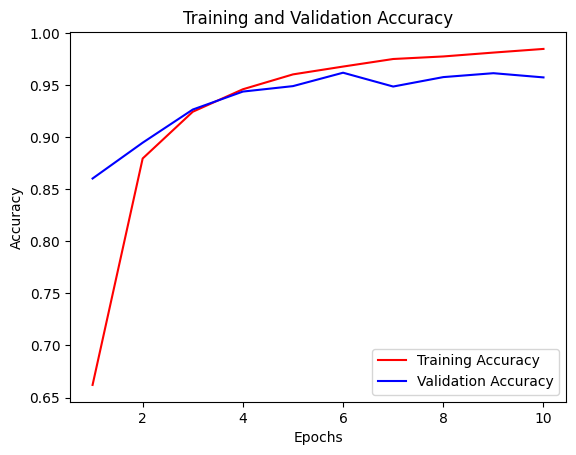

In [41]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [58]:
test_set=validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [59]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


array([[9.9999940e-01, 2.0787591e-07, 3.0733599e-08, ..., 7.6179982e-14,
        1.4301911e-12, 5.5632985e-12],
       [1.0000000e+00, 1.5677731e-10, 5.4996679e-10, ..., 5.7829095e-20,
        1.1315680e-14, 2.2294299e-16],
       [9.9999988e-01, 9.5779752e-11, 5.3156854e-11, ..., 2.4232721e-18,
        1.7892578e-14, 1.0928667e-11],
       ...,
       [5.6043264e-10, 5.0928889e-14, 6.0229410e-10, ..., 7.0241897e-13,
        9.3787506e-14, 9.9999893e-01],
       [2.8602667e-11, 3.9359752e-16, 8.4117435e-12, ..., 9.1917957e-15,
        4.7819753e-15, 1.0000000e+00],
       [4.1524494e-15, 9.6626468e-17, 1.5295375e-14, ..., 1.2952703e-17,
        4.1314397e-13, 1.0000000e+00]], dtype=float32)

In [60]:
y_pred.shape

(17572, 38)

In [62]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories.shape

TensorShape([17572])

In [65]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)>

In [66]:
from sklearn.metrics import confusion_matrix,classification_report



In [68]:
print(classification_report(true_categories,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [69]:
cm=confusion_matrix(true_categories,predicted_categories)
cm

array([[469,   4,   0, ...,   0,   1,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   0, 428, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 480]])

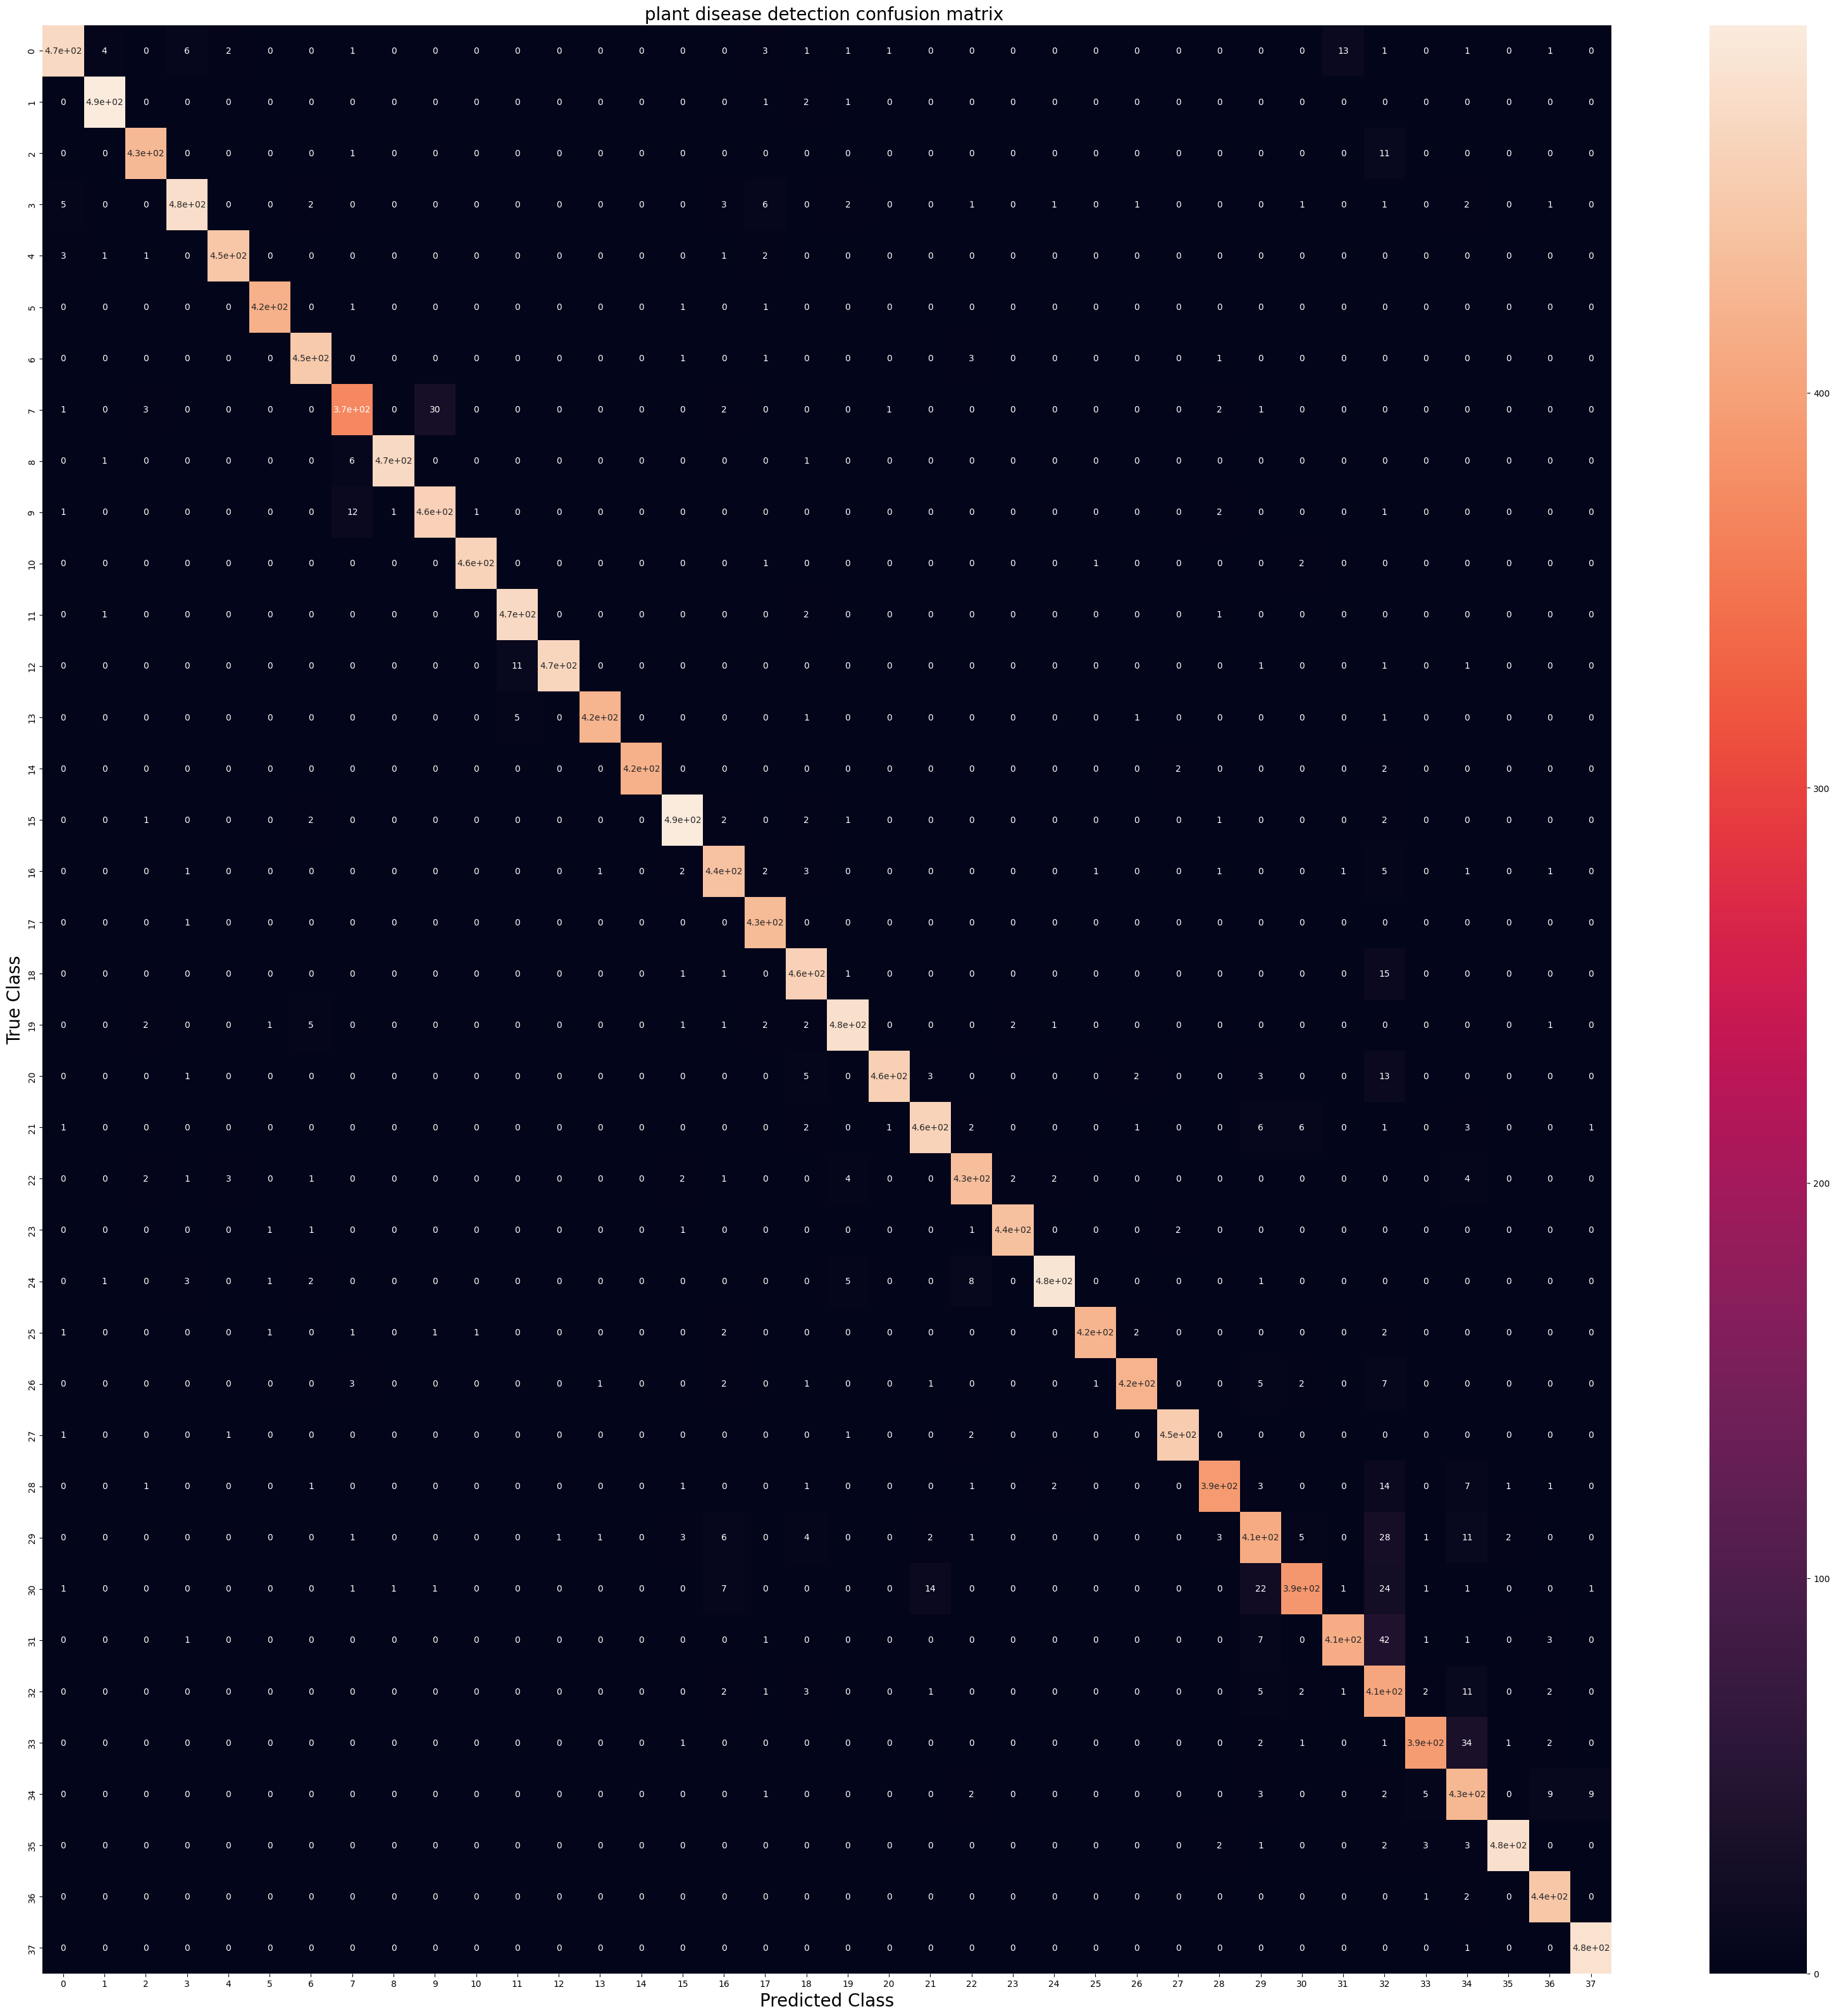

In [80]:
plt.figure(figsize=(40,40))

sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('True Class',fontsize=20)
plt.title("plant disease detection confusion matrix ",fontsize=20)
plt.show()

In [85]:
# from google.colab import drive
# import shutil



# # Create a folder in Drive for the test dataset
# !mkdir -p "/content/drive/MyDrive/dataset/test"

# # Move only the test dataset to Drive (Adjust path if needed)
# shutil.move("/content/dataset/test", "/content/drive/MyDrive/dataset/test")


Error: Destination path '/content/drive/MyDrive/dataset/test/test' already exists